In [22]:
import numpy as np
import pycbc.waveform as pycbc_wf
import bilby
import logging
logger = logging.getLogger(__name__)
import matplotlib.pyplot as plt

import pycbc

In [75]:
bilby.core.utils.parsec

3.085677581491367e+16

In [40]:
def time_domain_model(time_array, mass_1, mass_2, luminosity_distance, theta_jn, phase,
         a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl, 
         **waveform_kwargs):
    """ Time Domain Model for the inspiral phase """
    
    start_frequency = minimum_frequency = waveform_kwargs.get('minimum_frequency', 20.0)

    reference_frequency = waveform_kwargs.get('reference_frequency', 50.0)
    

    
    m1 = mass_1 #* bilby.core.utils.solar_mass
    m2 = mass_2 #* bilby.core.utils.solar_mass
    #luminosity_distance = luminosity_distance * 1e6 * bilby.core.utils.parsec
    
    minimum_time = time_array[0]
    maximum_time = time_array[-1]
    
    iota, spin_1x, spin_1y, spin_1z, spin_2x, spin_2y, spin_2z = bilby.gw.conversion.bilby_to_lalsimulation_spins(
        theta_jn=theta_jn, phi_jl=phi_jl, tilt_1=tilt_1, tilt_2=tilt_2,
        phi_12=phi_12, a_1=a_1, a_2=a_2, mass_1=m1, mass_2=m2,
        reference_frequency=reference_frequency, phase=phase)


    
    delta_time = time_array[1] - time_array[0]
    
#     time_bounds = ((time_array >= minimum_time) *
#                         (time_array <= maximum_time))
    

    hplus, hcross = pycbc_wf.get_td_waveform( approximant = 'IMRPhenomPv2',#'SpinTaylorT4',
            mass1=mass_1, mass2=mass_2, spin1x=spin_1x,  spin1y=spin_1y, spin1z=spin_1z, 
            spin2x=spin_2x, spin2y=spin_2y, spin2z=spin_2z, distance=luminosity_distance, 
            inclination=iota, coa_phase=phase,  delta_t = delta_time,
            f_lower = start_frequency, f_ref=reference_frequency)
            #**waveform_dictionary)

    h_plus = np.zeros_like(time_array, dtype=complex)
    h_cross = np.zeros_like(time_array, dtype=complex)


    if len(hplus.data.data) > len(time_array):

        h_plus = hplus.data.data[:len(h_plus)]
        h_cross = hcross.data.data[:len(h_cross)]

        
    else:
        h_plus[-len(hplus.data.data):] = hplus.data.data
        h_cross[-len(hcross.data.data):] = hcross.data.data

#     h_plus *= time_bounds
#     h_cross *= time_bounds
    
    tindex = np.argmax(h_plus)
    zeros_length = len(h_plus[tindex:])
    
    h_plus = h_plus[:tindex]
    h_cross = h_cross[:tindex]
    
    h_plus = np.concatenate((np.zeros(zeros_length), h_plus))
    h_cross = np.concatenate((np.zeros(zeros_length), h_cross))
    



    return dict(plus=h_plus, cross=h_cross)

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


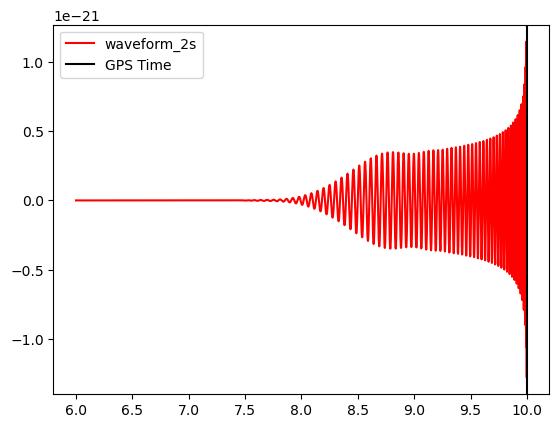

In [47]:
#tg = 1126259462.4
tg=10
t = np.arange(tg-4,tg,1/2048)

model = time_domain_model(t, 20, 30, 400, 0.3, 0.2,
         a_1=0.3, a_2=0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0)['plus']

#t6 = np.arange(tg-4,tg,1/2048)

# model6 = time_domain_model(t6, 20, 30, 400, 0.3, 0.2,
#          a_1=0.3, a_2=0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0)['plus']



plt.plot(t,model,color='r',label='waveform_2s')
#plt.plot(t6,model6,color='b',label='waveform_4s')



plt.axvline(tg,color='k',label='GPS Time')
plt.legend()
plt.show()

No handles with labels found to put in legend.


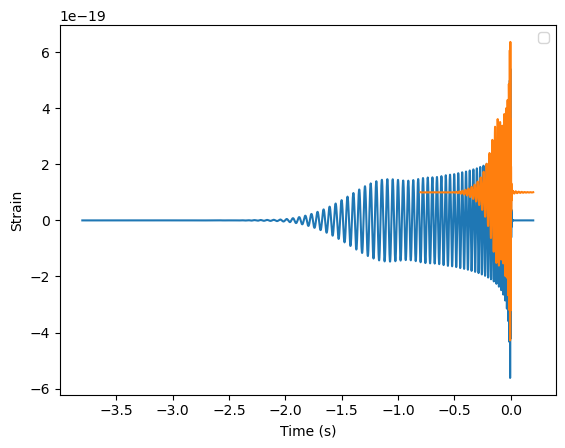

In [72]:
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform



hp, hc = get_td_waveform(approximant='IMRPhenomPv2',
                                 mass1=20,
                                 mass2=30,
                                 a_1=0.3,
                                 a_2 = 0.4,
                                 delta_t=1.0/4096,
                                 f_lower=20)

hp1, hc1 = get_td_waveform(approximant='IMRPhenomPv2',
                                 mass1=20,
                                 mass2=30,
                                 a_1=0.3,
                                 a_2 = 0.4,
                                 delta_t=1.0/2048,
                                 f_lower=40)


pp.plot(hp.sample_times, hp)
pp.plot(hp1.sample_times, hp1+1e-19)

pp.ylabel('Strain')
pp.xlabel('Time (s)')
pp.legend()
pp.show()

In [26]:
tarr = np.arange(-4,0,1/2048)
tdwf = time_domain_model(tarr, 50, 30, 400, 0.3, 0.2,
         a_1=0.3, a_2=0.4, tilt_1=0.0, tilt_2=0.0, phi_12=0.0, phi_jl=0.0)['plus']

In [27]:
len(tdwf), len(tarr)

(8192, 8192)

In [4]:
injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=400.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
)

In [9]:
duration = 4
sampling_frequency = 4096
outdir = "pe_inspiral_injection"
label = "time_domain_source_model"

In [10]:
waveform = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    time_domain_source_model=time_domain_model,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    start_time=injection_parameters["geocent_time"] - duration,
)

07:11 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: None
  time_domain_source_model: __main__.time_domain_model
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [11]:
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])

In [12]:
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - duration,
)


In [111]:
ifos.inject_signal(
    waveform_generator=waveform, parameters=injection_parameters, raise_error=False
)

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
06:22 bilby INFO    : Injected signal in H1:
06:22 bilby INFO    :   optimal SNR = 52.71
06:22 bilby INFO    :   matched filter SNR = 52.74-0.36j
06:22 bilby INFO    :   mass_1 = 36.0
06:22 bilby INFO    :   mass_2 = 29.0
06:22 bilby INFO    :   a_1 = 0.4
06:22 bilby INFO    :   a_2 = 0.3
06:22 bilby INFO    :   tilt_1 = 0.5
06:22 bilby INFO    :   tilt_2 = 1.0
06:22 bilby INFO    :   phi_12 = 1.7
06:22 bilby INFO    :   phi_jl = 0.3
06:22 bilby INFO    :   luminosity_distance = 400.0
06:22 bilby INFO    :   theta_jn = 0.4
06:22 bilby INFO    :   psi = 2.659
06:22 bilby INFO    :   phase = 1.3
06:22 bilby INFO    :   geocent_time = 1126259642.413
06:22 bilby INFO    :   ra = 1.375
06:22 bilby INFO    :   dec = -1.2108
06:22 bilby INFO    : I

[{'plus': array([-4.27285456e-25+0.00000000e+00j, -4.27499532e-25-3.16924501e-27j,
         -4.28120826e-25-6.20686949e-27j, ...,
         -2.07806213e-25+6.28698596e-29j, -2.07811111e-25+3.08954769e-29j,
         -2.07812802e-25+0.00000000e+00j]),
  'cross': array([-1.41043168e-24+0.00000000e+00j, -1.41055508e-24-1.14068461e-29j,
         -1.41091100e-24+5.96536512e-29j, ...,
          4.84869143e-26+3.12862768e-29j,  4.84965060e-26+1.67000913e-29j,
          4.84998186e-26+0.00000000e+00j])},
 {'plus': array([-4.27285456e-25+0.00000000e+00j, -4.27499532e-25-3.16924501e-27j,
         -4.28120826e-25-6.20686949e-27j, ...,
         -2.07806213e-25+6.28698596e-29j, -2.07811111e-25+3.08954769e-29j,
         -2.07812802e-25+0.00000000e+00j]),
  'cross': array([-1.41043168e-24+0.00000000e+00j, -1.41055508e-24-1.14068461e-29j,
         -1.41091100e-24+5.96536512e-29j, ...,
          4.84869143e-26+3.12862768e-29j,  4.84965060e-26+1.67000913e-29j,
          4.84998186e-26+0.00000000e+00j])}]

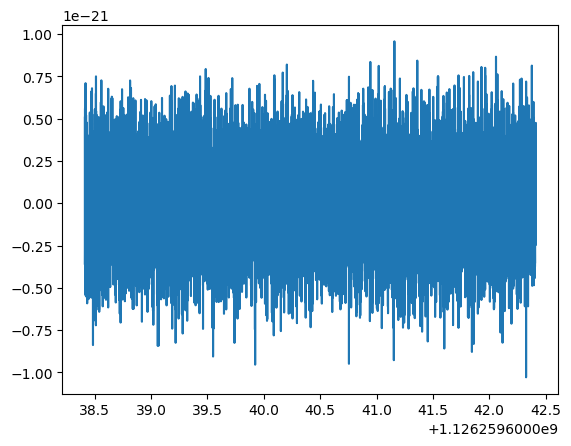

In [13]:
plt.plot(ifos[0].time_array,ifos[0].time_domain_strain)

In [14]:
priors = bilby.gw.prior.BBHPriorDict()
for key in [
    "a_1",
    "a_2",
    "tilt_1",
    "tilt_2",
    "phi_12",
    "phi_jl",
    "psi",
    "ra",
    "dec",
    "geocent_time",
    "phase",
]:
    priors[key] = injection_parameters[key]

07:11 bilby INFO    : No prior given, using default BBH priors in /cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


In [15]:
priors

{'mass_1': Constraint(minimum=5, maximum=100, name='mass_1', latex_label='$m_1$', unit=None),
 'mass_2': Constraint(minimum=5, maximum=100, name='mass_2', latex_label='$m_2$', unit=None),
 'mass_ratio': Uniform(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None),
 'chirp_mass': Uniform(minimum=25, maximum=100, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None),
 'luminosity_distance': UniformSourceFrame(minimum=100.0, maximum=5000.0, cosmology=FlatLambdaCDM(name="Planck15", H0=67.74 km / (Mpc s), Om0=0.3075, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), name='luminosity_distance', latex_label='$d_L$', unit=Unit("Mpc"), boundary=None),
 'dec': -1.2108,
 'ra': 1.375,
 'theta_jn': Sine(minimum=0, maximum=3.141592653589793, name='theta_jn', latex_label='$\\theta_{JN}$', unit=None, boundary=None),
 'psi': 2.659,
 'phase': 1.3,
 'a_1': 0.4,
 'a_2': 0.3,
 'tilt_1': 0.5,
 'tilt_2': 1.0,
 'phi_12': 1.7,
 'phi_jl'

In [16]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(ifos, waveform)

In [19]:
result = bilby.core.sampler.run_sampler(
    likelihood,
    priors,
    sampler="dynesty",
    
    
    nlive = 50,
    #npool=8,
    nact=5,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
)


08:30 bilby INFO    : Running for label 'time_domain_source_model', output will be saved to 'pe_inspiral_injection'
08:30 bilby INFO    : Using lal version 7.1.7
08:30 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.1.7;Id: c0930b69d9f2ad7151d1cadea5df72633ec47e67;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
08:30 bilby INFO    : Using lalsimulation version 3.1.2
08:30 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v3.1.2;Id: 8c3a6977aa553c9a2019ec287a61dc5ee92087b4;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
08:30 bilby INFO    : Search parameters:
08:30 bilby INFO    :   mass_ratio = Uniform(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
08:30 bilby INFO    :   chirp_mass = Uniform(minimum=25, maximum=100, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
08:30 b

0it [00:00, ?it/s]

08:30 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 50, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 30, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7ff17073f8e0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
08:30 bilby INFO    : Checkpoint every check_point_delta_t = 600s
08:30 bilby INFO    : Using dynesty version 1.0.1
08:30 bilby INFO    : Using the bilby

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/cvm

08:50 bilby INFO    : Written checkpoint file pe_inspiral_injection/time_domain_source_model_resume.pickle
08:50 bilby INFO    : Sampling time: 0:19:33.497974
08:50 bilby INFO    : Summary of results:
nsamples: 540
ln_noise_evidence: -16080.301
ln_evidence: -16080.787 +/-  0.480
ln_bayes_factor: -0.486 +/-  0.480



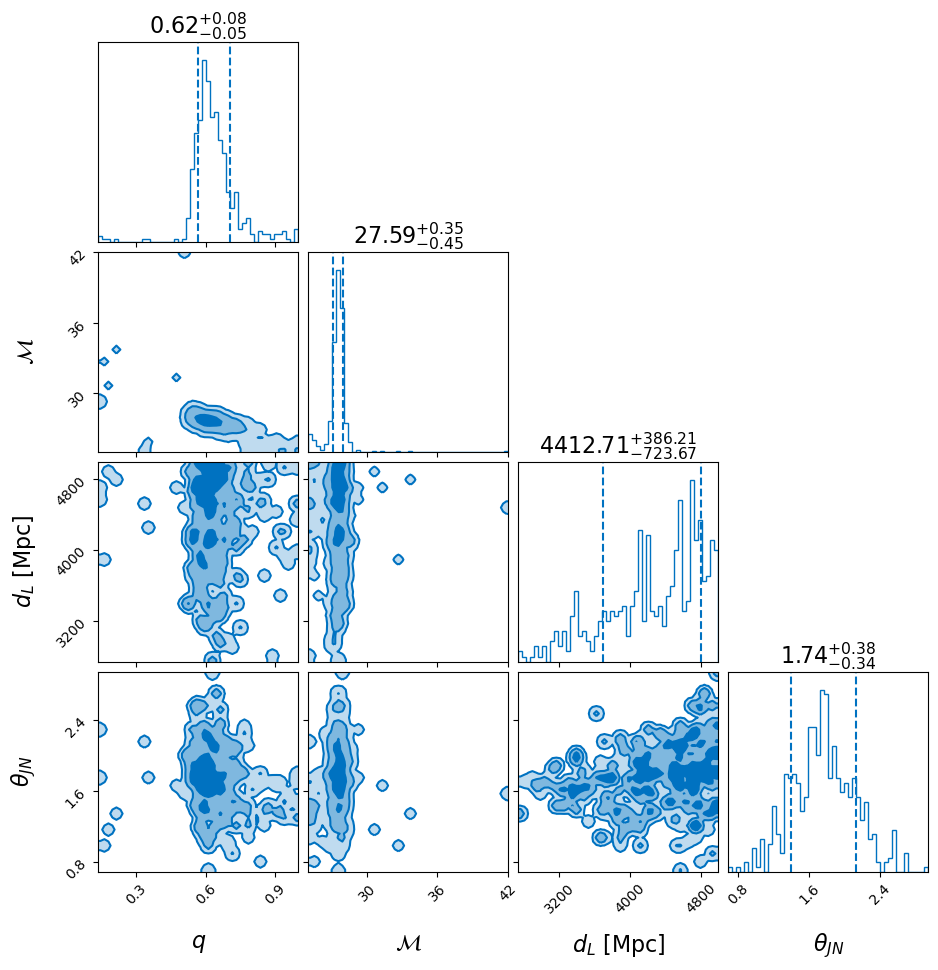

In [20]:
result.plot_corner()

In [134]:
import pandas as pd

In [156]:
#pd.set_option('display.max_columns', None)
file = pd.read_pickle('/home1/akash.mishra/Area_law/outdir/time_domain_source_model_dynesty.pickle')

In [157]:
file

       nlive: 50
       niter: 760
       ncall: array([  3,   1,   2,   2,   1,   2,   2,   1,   3,   2,   1,   1,   6,
         3,   2,   4,   1,   3,   1,   2,   2,   6,   1,   2,   5,   1,
         7,   2,   1,   7,   5,  15,   1,   3,   3,   4,   1,   2,   8,
         5,   2,   5,   1,   1,   5,  15,   6,   1,   4,   3,  10,   1,
         7,   1,   9,   5,   3,  23,   3,   5,   8,   7,  12,   7,  14,
        10,   9,   9,   6,   1,   2,   6,  28,  12,  14,   9,  18,  10,
         6,  21,   6,  10,  26,   2,  22,   9,  10,  11,   8,  24,   2,
         2,  39,  27,   5,  15,   6,   5,   2,  28,  29,   3,  21,  55,
        36,   4,  18,   1,  33, 116,  34, 133,  18,  18,   6,   6,   6,
         6,  18,   6,  18,   6,   6,  12,   6,   6,   6,   6,  12,   6,
         6,   6,   6,  12,   6,   6,  12,  12,  51,   9,   6,  13,   6,
         6,  12,  30,  24,  12,  25,   6,  13,   6,  18,   6,  20,   6,
        12,   6,   6,  12,   6,   7,  15,  54,  10,  34,  12,  12,  12,
        10,  21

In [118]:
res = bilby.core.result.Result(result)

In [125]:
mass_rat = res.from_json('/home1/akash.mishra/Area_law/Notebooks/outdir_inj_1/time_domain_source_model_result.json').posterior['mass_ratio']
dist = res.from_json('/home1/akash.mishra/Area_law/Notebooks/outdir_inj_1/time_domain_source_model_result.json').posterior['luminosity_distance']

In [119]:
res.from_json('/home1/akash.mishra/Area_law/Notebooks/outdir_inj/time_domain_source_model_result.json').posterior

,mass_ratio,chirp_mass,luminosity_distance,theta_jn,dec,ra,psi,phase,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,geocent_time,log_likelihood,log_prior
0,0.774116,28.310552,883.801235,1.664035,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,130.788016,-13.711531
1,0.884953,27.685832,1783.906128,0.596762,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,131.872532,-13.459233
2,0.885307,27.743227,1748.607121,0.583672,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,132.418138,-13.498643
3,0.780235,28.398074,1233.496398,0.897621,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,132.766591,-13.530851
4,0.745633,28.169099,1403.695231,0.559014,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,133.008389,-13.769942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,0.848330,27.906959,1167.842852,0.930629,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,143.148898,-13.571030
8464,0.848330,27.906959,1167.842852,0.930629,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,143.148898,-13.571030
8465,0.847327,27.909911,1071.075021,1.070957,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,143.154785,-13.587673
8466,0.846792,27.933700,1168.664949,0.931960,-1.2108,1.375,2.659,1.3,0.4,0.3,0.5,1.0,1.7,0.3,1.126260e+09,143.182708,-13.569186


(array([  1.,   0.,   0.,   2.,   9.,  10.,   2.,  11.,  13.,  32.,  51.,
         23.,  24.,  41.,  34.,  36.,  57.,  59.,  61., 109.,  84.,  68.,
         91., 110., 127., 111., 103.,  33.,   6.,   2.]),
 array([238.75875497, 246.0518172 , 253.34487944, 260.63794167,
        267.93100391, 275.22406614, 282.51712837, 289.81019061,
        297.10325284, 304.39631508, 311.68937731, 318.98243955,
        326.27550178, 333.56856401, 340.86162625, 348.15468848,
        355.44775072, 362.74081295, 370.03387518, 377.32693742,
        384.61999965, 391.91306189, 399.20612412, 406.49918635,
        413.79224859, 421.08531082, 428.37837306, 435.67143529,
        442.96449753, 450.25755976, 457.55062199]),
 <BarContainer object of 30 artists>)

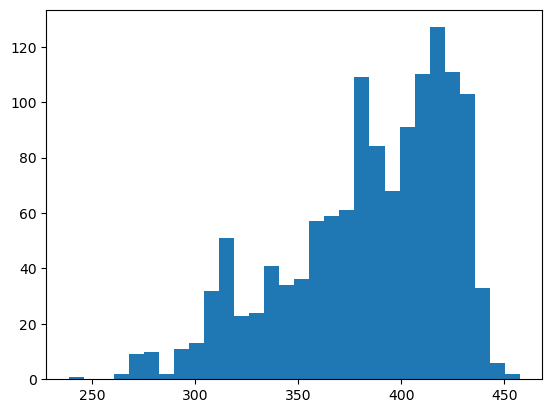

In [128]:
plt.hist(dist, bins = 30)

In [38]:
bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters(A)

({'mass_1': 500,
  'total_mass': 200,
  'mass_2': -300,
  'phi_jl': 0.0,
  'phi_12': 0.0},
 ['mass_2', 'phi_jl', 'phi_12'])

In [37]:
A = {'mass_1': 500, 'total_mass':200}

In [33]:
A

{'mass_1': 30}

In [43]:
bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters??

In [46]:
pycbc_wf.get_fd_waveform??